### PG - Pablo Louzada Schiavo

In [1]:
# Importando bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sc
# Importando bibliotecas para domínio da frequência
import tsfresh
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [2]:
# Definindo parâmetros da aquisição dos dados
fs = 2000 #Hz
nomes_colunas = ["Horiz_Esq", "Vert_Esq", "Horiz_Dir", "Vert_Dir"]
numero_sensor = ["1", "2", "3", "4"]
'''
Horiz_Esq - 1
Vert_Esq - 2
Horiz_Dir - 3
Vert_Dir - 4
'''

'\nHoriz_Esq - 1\nVert_Esq - 2\nHoriz_Dir - 3\nVert_Dir - 4\n'

In [3]:
# Lendo um dos arquivos
df = pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 24/37 hz/37hz_5.csv', names = nomes_colunas)
df.Horiz_Esq

0       -0.019274
1       -0.016673
2       -0.011725
3       -0.011535
4       -0.016455
           ...   
15995    0.001109
15996   -0.001147
15997    0.005238
15998    0.005369
15999   -0.009888
Name: Horiz_Esq, Length: 16000, dtype: float64

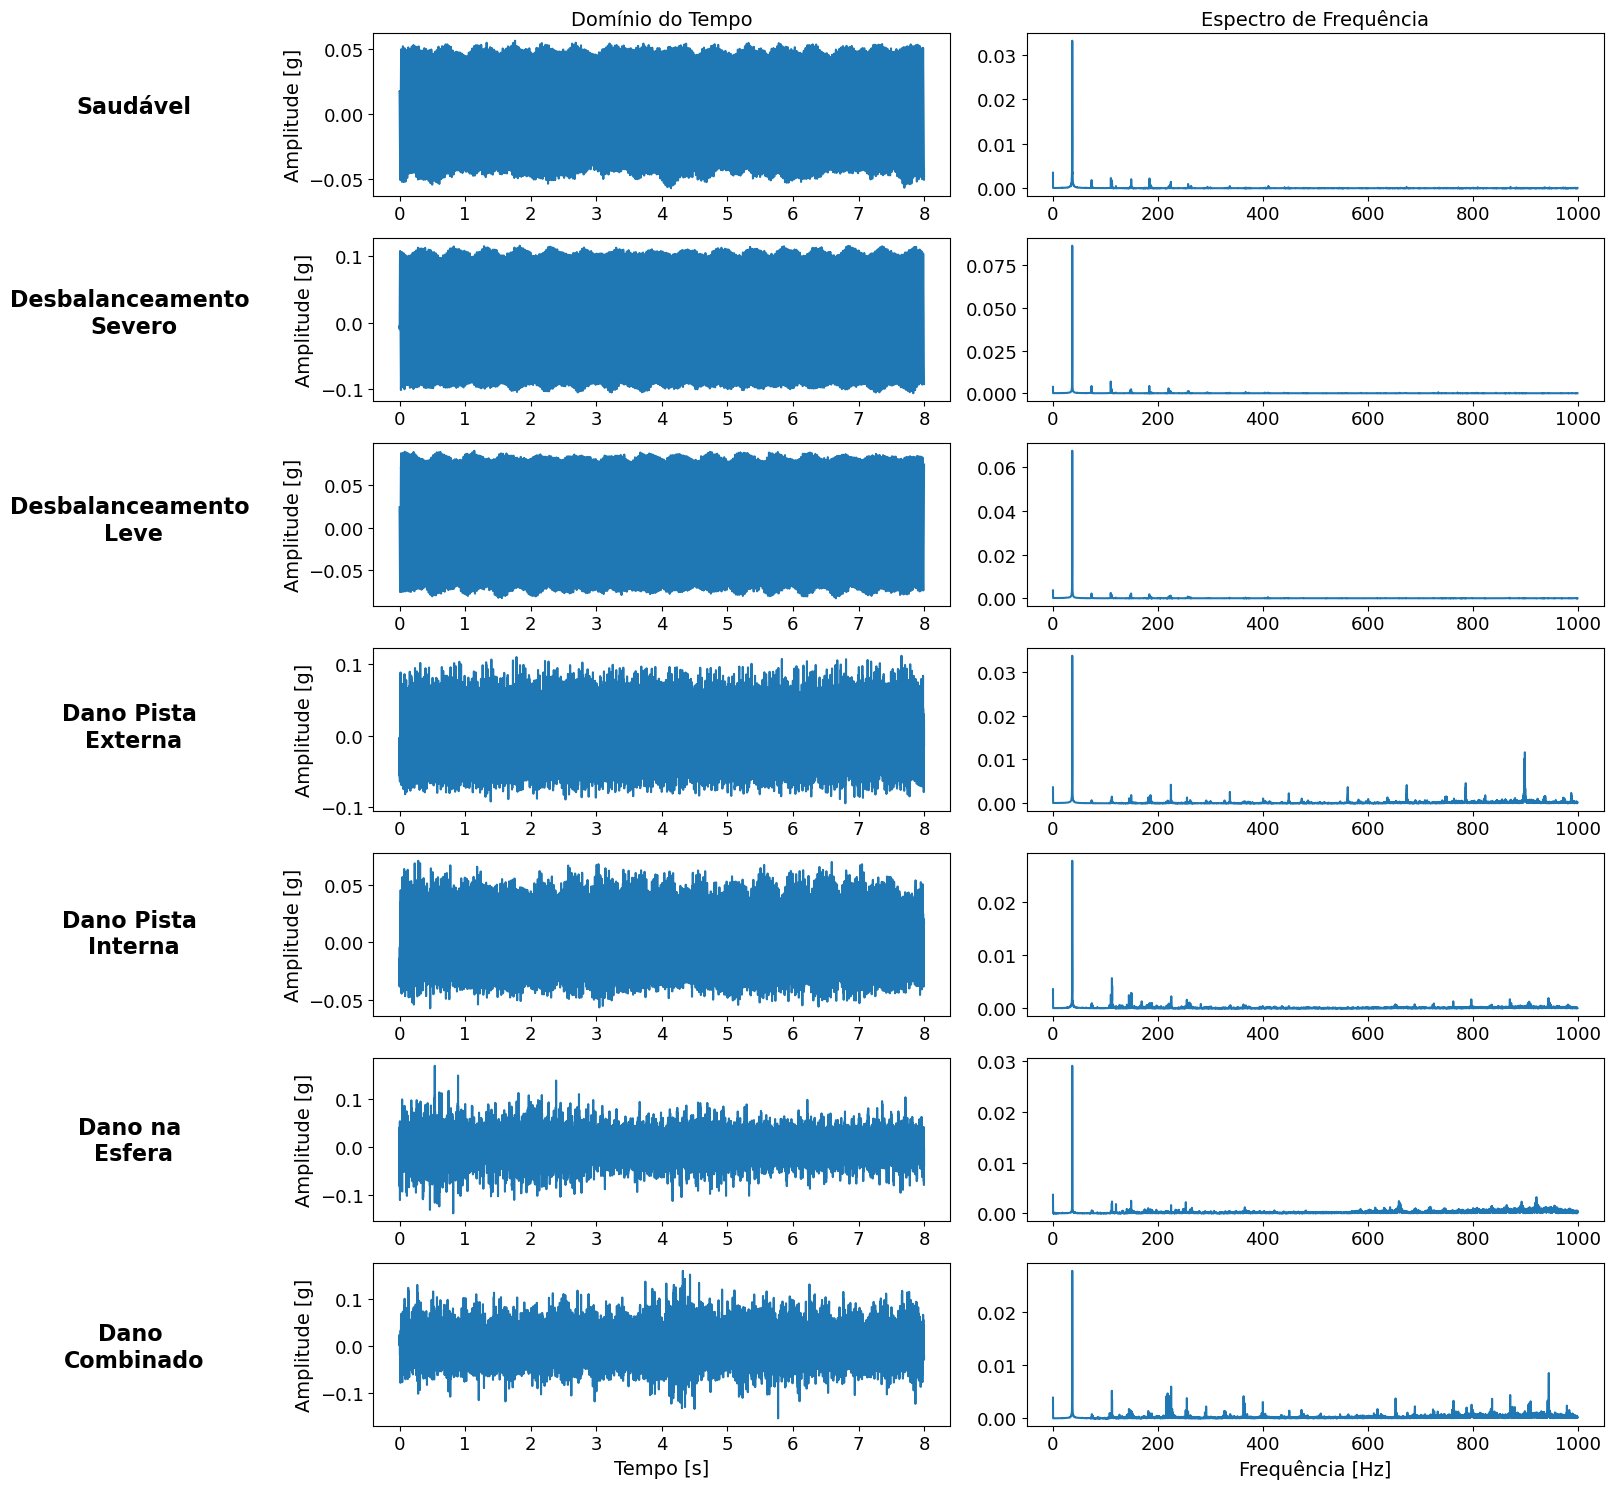

In [6]:
# Definindo os nomes das colunas (ajuste conforme necessário)
nomes_condicao = ['Saudável', 'Desbalanceamento \nSevero', 'Desbalanceamento \nLeve', 'Dano Pista \nExterna', 'Dano Pista \nInterna',
                  'Dano na \nEsfera', 'Dano \nCombinado']

# Carregando os DataFrames
dfs = [
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 6/37 hz/37hz_5.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 7/37 hz/37hz_5.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 8/37 hz/37hz_5.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 39/37 hz/37hz_5.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 9/37 hz/37hz_5.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 33/37 hz/37hz_8.csv', names=nomes_colunas),
    pd.read_csv('../../Dados_MFS_2024/DADOS CONDICAO 21/37 hz/37hz_5.csv', names=nomes_colunas)
]

# Parâmetros
fs = 2000  # Frequência de amostragem em Hz
T = 1.0 / fs  # Intervalo de amostragem
N = int(8.0 * fs)  # Número de amostras (8 segundos de dados)

# Criando a figura com subplots no formato 7x2
fig, axs = plt.subplots(7, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário

# Iterando sobre cada DataFrame e gerando os gráficos
for i, df in enumerate(dfs, start=1):
    # Gerando o sinal a partir da coluna 'Horiz_Dir'
    signal = np.array(df['Horiz_Dir'])
    
    # Calculando a FFT
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]

    # Plotando o gráfico no domínio do tempo
    axs[i-1, 0].plot(np.linspace(0.0, N*T, N, endpoint=False), signal)
    if i == 1:
        axs[i-1, 0].set_title('Domínio do Tempo', fontsize=14)
    if i == 7:
        axs[i-1, 0].set_xlabel('Tempo [s]', fontsize=14)
    axs[i-1, 0].set_ylabel('Amplitude [g]', fontsize=14)

    # Plotando o gráfico no domínio da frequência
    axs[i-1, 1].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    if i == 1:
        axs[i-1, 1].set_title('Espectro de Frequência', fontsize=14)
    if i == 7:
        axs[i-1, 1].set_xlabel('Frequência [Hz]', fontsize=14)
        
        # Aumentando o tamanho da fonte dos valores dos eixos x e y
    axs[i-1, 0].tick_params(axis='x', labelsize=13)
    axs[i-1, 0].tick_params(axis='y', labelsize=13)
    axs[i-1, 1].tick_params(axis='x', labelsize=13)
    axs[i-1, 1].tick_params(axis='y', labelsize=13)

# Adicionando os rótulos à esquerda dos gráficos com destaque
for i, nome in enumerate(nomes_condicao, start=1):
    fig.text(0.01,(8-i)/7 - 0.08 + 0.005*i, nome, va='center', ha='center', rotation='horizontal', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0, 1, 1])
plt.savefig('dados-medidos.pdf', format='pdf', bbox_inches='tight')
plt.show()


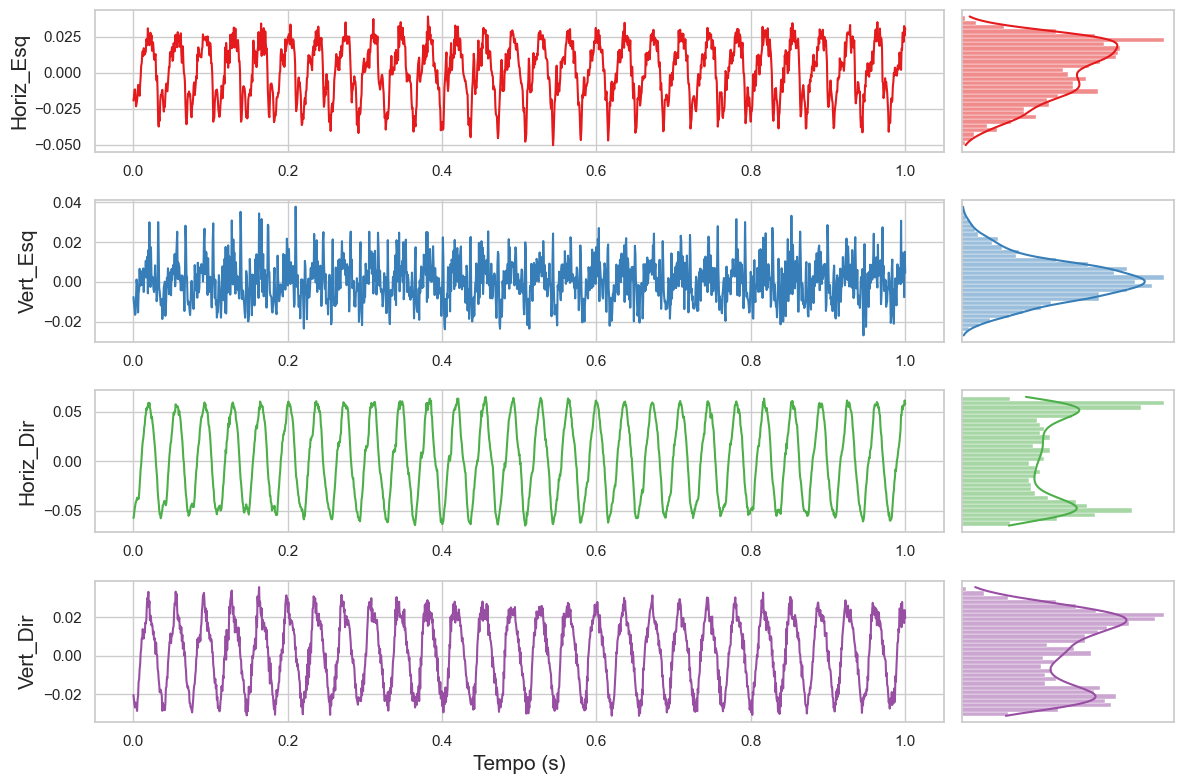

In [19]:
#Segregando parte dos dados para plotagem
t = np.linspace(0, 1, 1500)
radial1 = df.Horiz_Esq[0:1500]
radial2 = df.Vert_Esq[0:1500]
tangencial1 = df.Horiz_Dir[0:1500]
tangencial2 = df.Vert_Dir[0:1500]

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria a figura e os eixos
fig, axes = plt.subplots(4, 2, gridspec_kw={'width_ratios': [4, 1]}, figsize=(12, 8))

# Lista de sinais e títulos
signals = [radial1, radial2, tangencial1, tangencial2]
titles = ["Horiz_Esq", "Vert_Esq", "Horiz_Dir", "Vert_Dir"]
colors = sns.color_palette("Set1", n_colors=4)

for i, (signal, title, color) in enumerate(zip(signals, titles, colors)):
    # Plot do sinal no domínio do tempo
    axes[i, 0].plot(t, signal, color=color)
    axes[i, 0].set_ylabel(title, fontsize=15)
    if i == 3:
        axes[i, 0].set_xlabel('Tempo (s)', fontsize= 15)

    # Plot da distribuição (histograma)
    sns.histplot(y=signal, kde=True, ax=axes[i, 1], color=color, bins=30)
    axes[i, 1].set_yticks([])
    axes[i, 1].set_xticks([])
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlabel('')

# Ajusta o layout
plt.tight_layout()
#plt.show()

plt.savefig('histograma.pdf', format='pdf')


In [92]:
# Preparando um dataframe global
col_global = ["arquivo", "Condicao", "Freq", "divisao", 
              "valor_rms_1", "valor_rms_2", "valor_rms_3", "valor_rms_4", 
              "valor_sra_1", "valor_sra_2", "valor_sra_3", "valor_sra_4", 
              "valor_sv_1", "valor_sv_2", "valor_sv_3", "valor_sv_4",
              "valor_kts_1", "valor_kts_2", "valor_kts_3", "valor_kts_4", 
              "valor_ppv_1", "valor_ppv_2", "valor_ppv_3", "valor_ppv_4", 
              "valor_cf_1", "valor_cf_2", "valor_cf_3", "valor_cf_4", 
              "valor_if_1", "valor_if_2", "valor_if_3", "valor_if_4", 
              "valor_mf_1", "valor_mf_2", "valor_mf_3", "valor_mf_4", 
              "valor_sf_1", "valor_sf_2", "valor_sf_3", "valor_sf_4", 
              "valor_kf_1", "valor_kf_2", "valor_kf_3", "valor_kf_4", 
              "valor_h_1", "valor_h_2", "valor_h_3", "valor_h_4",
              "valor_ffc_1", "valor_ffc_2", "valor_ffc_3", "valor_ffc_4", 
              "valor_fvar_1", "valor_fvar_2", "valor_fvar_3", "valor_fvar_4", 
              "valor_fskew_1", "valor_fskew_2", "valor_fskew_3", "valor_fskew_4", 
              "valor_fkur_1", "valor_fkur_2", "valor_fkur_3", "valor_fkur_4"] # Nome das colunas temporariamente, pois terão mais 

df_global = pd.DataFrame({}, columns=col_global) # criando o df


In [93]:
def organizar_campos(arquivo, Condicao, Freq, dado_divisao, 
                     dado_rms_1, dado_rms_2, dado_rms_3, dado_rms_4, 
                     dado_sra_1, dado_sra_2, dado_sra_3, dado_sra_4, 
                     dado_sv_1, dado_sv_2, dado_sv_3, dado_sv_4,
                     dado_kts_1, dado_kts_2, dado_kts_3, dado_kts_4, 
                     dado_ppv_1, dado_ppv_2, dado_ppv_3, dado_ppv_4, 
                     dado_cf_1, dado_cf_2, dado_cf_3, dado_cf_4, 
                     dado_if_1, dado_if_2, dado_if_3, dado_if_4, 
                     dado_mf_1, dado_mf_2, dado_mf_3, dado_mf_4, 
                     dado_sf_1, dado_sf_2, dado_sf_3, dado_sf_4, 
                     dado_kf_1, dado_kf_2, dado_kf_3, dado_kf_4, 
                     dado_h_1, dado_h_2, dado_h_3, dado_h_4,
                     valor_ffc_1, valor_ffc_2, valor_ffc_3, valor_ffc_4, 
                     valor_fvar_1, valor_fvar_2, valor_fvar_3, valor_fvar_4, 
                     valor_fskew_1, valor_fskew_2, valor_fskew_3, valor_fskew_4, 
                     valor_fkur_1, valor_fkur_2, valor_fkur_3, valor_fkur_4):
    
    # Crie um dicionário com as chaves e valores fornecidos
    linha_organ = {"arquivo": arquivo, "Condicao": Condicao, "Freq": Freq, "divisao": dado_divisao, 
                   "valor_rms_1": dado_rms_1, "valor_rms_2": dado_rms_2, "valor_rms_3": dado_rms_3, "valor_rms_4": dado_rms_4, 
                   "valor_sra_1": dado_sra_1, "valor_sra_2": dado_sra_2, "valor_sra_3": dado_sra_3, "valor_sra_4": dado_sra_4, 
                   "valor_sv_1": dado_sv_1, "valor_sv_2": dado_sv_2, "valor_sv_3": dado_sv_3, "valor_sv_4": dado_sv_4,
                   "valor_kts_1": dado_kts_1, "valor_kts_2": dado_kts_2, "valor_kts_3": dado_kts_3, "valor_kts_4": dado_kts_4, 
                   "valor_ppv_1": dado_ppv_1, "valor_ppv_2": dado_ppv_2, "valor_ppv_3": dado_ppv_3, "valor_ppv_4": dado_ppv_4, 
                   "valor_cf_1": dado_cf_1, "valor_cf_2": dado_cf_2, "valor_cf_3": dado_cf_3, "valor_cf_4": dado_cf_4, 
                   "valor_if_1": dado_if_1, "valor_if_2": dado_if_2, "valor_if_3": dado_if_3, "valor_if_4": dado_if_4, 
                   "valor_mf_1": dado_mf_1, "valor_mf_2": dado_mf_2, "valor_mf_3": dado_mf_3, "valor_mf_4": dado_mf_4, 
                   "valor_sf_1": dado_sf_1, "valor_sf_2": dado_sf_2, "valor_sf_3": dado_sf_3, "valor_sf_4": dado_sf_4, 
                   "valor_kf_1": dado_kf_1, "valor_kf_2": dado_kf_2, "valor_kf_3": dado_kf_3, "valor_kf_4": dado_kf_4, 
                   "valor_h_1": dado_h_1, "valor_h_2": dado_h_2, "valor_h_3": dado_h_3, "valor_h_4": dado_h_4,
                   "valor_ffc_1": valor_ffc_1, "valor_ffc_2": valor_ffc_2, "valor_ffc_3": valor_ffc_3, "valor_ffc_4": valor_ffc_4, 
                   "valor_fvar_1": valor_fvar_1, "valor_fvar_2": valor_fvar_2, "valor_fvar_3": valor_fvar_3, "valor_fvar_4": valor_fvar_4, 
                   "valor_fskew_1": valor_fskew_1, "valor_fskew_2": valor_fskew_2, "valor_fskew_3": valor_fskew_3, "valor_fskew_4": valor_fskew_4, 
                   "valor_fkur_1": valor_fkur_1, "valor_fkur_2": valor_fkur_2, "valor_fkur_3": valor_fkur_3, "valor_fkur_4": valor_fkur_4}
    
    # Retorne o dicionário criado
    return linha_organ


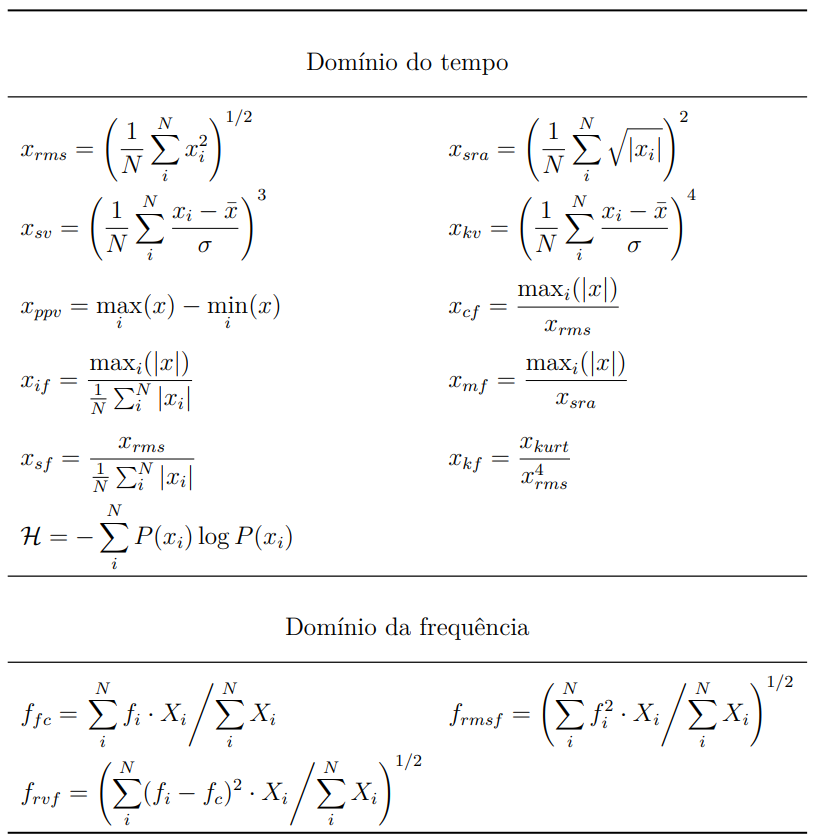

### Criando funções para calcular as características no domínio do tempo

In [94]:
# Valor RMS
Sinal_RMS = lambda sinal: np.sqrt(np.mean(np.square(sinal)))

# Valor SRA - Raiz Quadrada da Amplitude
Sinal_SRA = lambda sinal: np.square(np.mean(np.sqrt(abs(sinal))))

# Valor Pico a Pico
Sinal_PPV = lambda sinal: max(sinal) - min(sinal)

# Valor de Crista
Sinal_CF = lambda sinal: max(abs(sinal))/Sinal_RMS(sinal)

# Valor de impulso adminesional
Sinal_IF = lambda sinal: max(abs(sinal))/np.mean(abs(sinal))


In [95]:
# Função para realizar um split no sinal

def dividir_dataframe(df, tamanho_do_pedaco = 1000):
    # Inicialize uma lista para armazenar os DataFrames divididos
    pedacos = []
    # Calcule o número total de pedaços necessários
    total_de_pedacos = len(df) // tamanho_do_pedaco

    # Use um loop for para dividir o DataFrame
    for i in range(total_de_pedacos):
        # Calcule os índices de início e fim para o pedaço atual
        start_idx = i * tamanho_do_pedaco
        end_idx = (i + 1) * tamanho_do_pedaco

        # Use iloc para selecionar as linhas do pedaço atual
        pedaco = (df.iloc[start_idx:end_idx]).reset_index(drop=True)

        # Adicione o pedaço à lista de pedaços
        pedacos.append(pedaco)
    
    # Retorne a lista de pedaços
    return pedacos

### Criando funções para calcular as características no domínio da frequência

In [96]:
# Valor de frequência central ou centroid espectral
Sinal_fFC = lambda sinal: list(tsfresh.feature_extraction.feature_calculators.fft_aggregated(df["1"], param= [{'aggtype': 'centroid'}]))[0][1]
                               
def freq_params (sinal):
    params = list(tsfresh.feature_extraction.feature_calculators.fft_aggregated(sinal, param= [{'aggtype': 'centroid'}, {'aggtype': 'variance'}, {'aggtype': 'skew'}, {'aggtype': 'kurtosis'}]))
    Sinal_fFC = params[0][1]
    Sinal_fVar = params[1][1]
    Sinal_fSkew = params[2][1]
    Sinal_fKurtosis = params[3][1] 
    
    return(Sinal_fFC, Sinal_fVar, Sinal_fSkew, Sinal_fKurtosis)

In [97]:
def top3_peaks(acc_signal, sample_rate):
    # Número de amostras no sinal
    N = len(acc_signal)

    # Transformada Rápida de Fourier
    yf = fft(acc_signal)
    xf = fftfreq(N, 1 / sample_rate)

    # Apenas a metade positiva do espectro
    yf = np.abs(yf[:N // 2])
    xf = xf[:N // 2]

    # Encontra picos na magnitude do espectro
    peaks, _ = find_peaks(yf)

    # Ordena os picos pelas amplitudes e pega os 3 maiores
    if len(peaks) < 3:
        raise ValueError("Menos de 3 picos encontrados no sinal")

    top_peaks_indices = peaks[np.argsort(yf[peaks])][-4:]
    top_peaks_frequencies = xf[top_peaks_indices]
    top_peaks_amplitudes = yf[top_peaks_indices]

    # Ordena os resultados para retornar os picos em ordem decrescente de amplitude
    sorted_indices = np.argsort(top_peaks_amplitudes)[::-1]
    top_peaks_frequencies = top_peaks_frequencies[sorted_indices]
    top_peaks_amplitudes = top_peaks_amplitudes[sorted_indices]

    return top_peaks_frequencies, top_peaks_amplitudes

In [98]:
aux11 = np.array(df['Horiz_Esq'])
aux11

array([-0.019274, -0.016673, -0.011725, ...,  0.005238,  0.005369,
       -0.009888])

### Preenchendo a Matriz Global

In [9]:
# Diretório raiz onde estão os arquivos CSV
diretorio_raiz = '../../Dados_MFS_2024'

# Loop pelas condições
for condicao in range(0, 42):
    # Loop pelas frequências
    for frequencia in ['27 hz', '37 hz', '47 hz']:
        # Loop pelas subdivisões das frequências
        for subdivisao in range(1, 11):
            # Constrói o caminho completo para o arquivo CSV
            caminho_csv = os.path.join(diretorio_raiz, f'DADOS CONDICAO {condicao}', frequencia, f'{frequencia.replace(" ", "")}_{subdivisao}.csv')
            
            # Verifica se o arquivo existe
            if os.path.exists(caminho_csv):
                
                # Lê o arquivo CSV e cria um DataFrame
                df = pd.read_csv(caminho_csv, names = nomes_colunas)
                #dividindo o sinal
                df_splited = dividir_dataframe(df)
                print(len(df_splited))
                
                for j in range(0, len(df_splited)):

                    #Construindo a Matriz df_global
                    sinal = df[nomes_colunas[0]]
                    valor_rms_1 = Sinal_RMS(sinal)
                    valor_sra_1 = Sinal_SRA(sinal)
                    valor_sv_1 = sc.stats.skew(sinal)
                    valor_kts_1 = sc.stats.kurtosis(sinal)
                    valor_ppv_1 = Sinal_PPV(sinal)                
                    valor_cf_1 = Sinal_CF(sinal)
                    valor_if_1 = Sinal_IF(sinal)
                    valor_mf_1 = max(abs(sinal))/valor_sra_1
                    valor_sf_1 = valor_rms_1/np.mean(abs(sinal))
                    valor_kf_1 = valor_kts_1/(valor_rms_1**4)
                    valor_h_1 = sc.stats.entropy(sinal)
                    valor_ffc_1, valor_fvar_1, valor_fskew_1, valor_fkur_1 = freq_params(sinal)
                    
                    sinal = df[nomes_colunas[1]]
                    valor_rms_2 = Sinal_RMS(sinal)
                    valor_sra_2 = Sinal_SRA(sinal)
                    valor_sv_2 = sc.stats.skew(sinal)
                    valor_kts_2 = sc.stats.kurtosis(sinal)
                    valor_ppv_2 = Sinal_PPV(sinal)                
                    valor_cf_2 = Sinal_CF(sinal)
                    valor_if_2 = Sinal_IF(sinal)
                    valor_mf_2 = max(abs(sinal))/valor_sra_2
                    valor_sf_2 = valor_rms_2/np.mean(abs(sinal))
                    valor_kf_2 = valor_kts_2/(valor_rms_2**4)
                    valor_h_2 = sc.stats.entropy(sinal)
                    valor_ffc_2, valor_fvar_2, valor_fskew_2, valor_fkur_2 = freq_params(sinal)
                    
                    sinal = df[nomes_colunas[2]]
                    valor_rms_3 = Sinal_RMS(sinal)
                    valor_sra_3 = Sinal_SRA(sinal)
                    valor_sv_3 = sc.stats.skew(sinal)
                    valor_kts_3 = sc.stats.kurtosis(sinal)
                    valor_ppv_3 = Sinal_PPV(sinal)                
                    valor_cf_3 = Sinal_CF(sinal)
                    valor_if_3 = Sinal_IF(sinal)
                    valor_mf_3 = max(abs(sinal))/valor_sra_3
                    valor_sf_3 = valor_rms_3/np.mean(abs(sinal))
                    valor_kf_3 = valor_kts_3/(valor_rms_3**4)
                    valor_h_3 = sc.stats.entropy(sinal)
                    valor_ffc_3, valor_fvar_3, valor_fskew_3, valor_fkur_3 = freq_params(sinal)
                    
                    sinal = df[nomes_colunas[3]]
                    valor_rms_4 = Sinal_RMS(sinal)
                    valor_sra_4 = Sinal_SRA(sinal)
                    valor_sv_4 = sc.stats.skew(sinal)
                    valor_kts_4 = sc.stats.kurtosis(sinal)
                    valor_ppv_4 = Sinal_PPV(sinal)                
                    valor_cf_4 = Sinal_CF(sinal)
                    valor_if_4 = Sinal_IF(sinal)
                    valor_mf_4 = max(abs(sinal))/valor_sra_4
                    valor_sf_4 = valor_rms_4/np.mean(abs(sinal))
                    valor_kf_4 = valor_kts_4/(valor_rms_4**4)
                    valor_h_4 = sc.stats.entropy(sinal)
                    valor_ffc_4, valor_fvar_4, valor_fskew_4, valor_fkur_4 = freq_params(sinal)
                    
                    
                    
                    df_global = pd.concat([df_global, pd.DataFrame([
                         organizar_campos(caminho_csv, condicao, int(frequencia[0:2]), j, 
                                          valor_rms_1, valor_rms_2, valor_rms_3, valor_rms_4, 
                                          valor_sra_1, valor_sra_2, valor_sra_3, valor_sra_4, 
                                          valor_sv_1, valor_sv_2, valor_sv_3, valor_sv_4,
                                          valor_kts_1, valor_kts_2, valor_kts_3, valor_kts_4, 
                                          valor_ppv_1, valor_ppv_2, valor_ppv_3, valor_ppv_4, 
                                          valor_cf_1, valor_cf_2, valor_cf_3, valor_cf_4, 
                                          valor_if_1, valor_if_2, valor_if_3, valor_if_4, 
                                          valor_mf_1, valor_mf_2, valor_mf_3, valor_mf_4, 
                                          valor_sf_1, valor_sf_2, valor_sf_3, valor_sf_4, 
                                          valor_kf_1, valor_kf_2, valor_kf_3, valor_kf_4, 
                                          valor_h_1, valor_h_2, valor_h_3, valor_h_4,
                                          valor_ffc_1, valor_ffc_2, valor_ffc_3, valor_ffc_4, 
                                          valor_fvar_1, valor_fvar_2, valor_fvar_3, valor_fvar_4, 
                                          valor_fskew_1, valor_fskew_2, valor_fskew_3, valor_fskew_4, 
                                          valor_fkur_1, valor_fkur_2, valor_fkur_3, valor_fkur_4)])], ignore_index=True)


16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
1

In [10]:
df_global

,arquivo,Condicao,Freq,divisao,valor_rms_1,valor_rms_2,valor_rms_3,valor_rms_4,valor_sra_1,valor_sra_2,...,valor_fvar_3,valor_fvar_4,valor_fskew_1,valor_fskew_2,valor_fskew_3,valor_fskew_4,valor_fkur_1,valor_fkur_2,valor_fkur_3,valor_fkur_4
0,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,0,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
1,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,1,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
2,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,2,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
3,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,3,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
4,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,4,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20139,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,11,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20140,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,12,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20141,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,13,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20142,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,14,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511


In [11]:
# Salvar o DataFrame em um arquivo CSV
df_global.to_csv('dados_modf.csv', index=False)

In [12]:
dados = pd.read_csv('dados_modf.csv')
dados = dados.drop(['valor_h_1', 'valor_h_2', 'valor_h_3', 'valor_h_4'], axis=1)
dados

,arquivo,Condicao,Freq,divisao,valor_rms_1,valor_rms_2,valor_rms_3,valor_rms_4,valor_sra_1,valor_sra_2,...,valor_fvar_3,valor_fvar_4,valor_fskew_1,valor_fskew_2,valor_fskew_3,valor_fskew_4,valor_fkur_1,valor_fkur_2,valor_fkur_3,valor_fkur_4
0,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,0,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
1,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,1,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
2,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,2,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
3,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,3,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
4,../../Dados_MFS_2024\DADOS CONDICAO 0\27 hz\27...,0,27,4,0.045688,0.062205,0.075899,0.046383,0.032142,0.044616,...,6.413844e+06,7.781734e+06,-0.021443,-0.315039,0.766551,0.226369,20.131793,42.952788,5.867428,9.720540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20139,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,11,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20140,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,12,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20141,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,13,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511
20142,../../Dados_MFS_2024\DADOS CONDICAO 41\47 hz\4...,41,47,14,0.038519,0.040955,0.061812,0.041440,0.026975,0.027124,...,7.053902e+06,4.311252e+06,-0.513022,-1.005524,-0.415355,-1.389407,50.068145,201.266011,25.635892,167.412511


In [13]:
dados.describe()

,Condicao,Freq,divisao,valor_rms_1,valor_rms_2,valor_rms_3,valor_rms_4,valor_sra_1,valor_sra_2,valor_sra_3,...,valor_fvar_3,valor_fvar_4,valor_fskew_1,valor_fskew_2,valor_fskew_3,valor_fskew_4,valor_fkur_1,valor_fkur_2,valor_fkur_3,valor_fkur_4
count,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,...,2.014400e+04,2.014400e+04,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000,20144.000000
mean,20.496426,37.000000,7.500000,0.048732,0.046859,0.080461,0.045678,0.034479,0.031678,0.061841,...,6.037801e+06,5.857209e+06,-0.197569,-0.370391,0.113088,-0.568442,51.174003,104.399090,32.716748,95.352079
std,12.125369,8.168411,4.609887,0.069185,0.056034,0.126405,0.057977,0.048779,0.038898,0.097480,...,1.037492e+06,1.575918e+06,0.370581,0.314342,0.767634,0.687200,38.908887,71.759057,32.644906,97.012523
min,0.000000,27.000000,0.000000,0.003737,0.005291,0.003369,0.003292,0.002510,0.003362,0.002313,...,3.643914e+06,2.987143e+06,-1.008758,-1.185973,-1.152213,-1.767884,5.466773,9.441799,4.248777,3.465015
25%,10.000000,27.000000,3.750000,0.016603,0.016558,0.019740,0.017431,0.010931,0.011307,0.012731,...,5.185275e+06,4.376508e+06,-0.511907,-0.611430,-0.516315,-1.096373,20.098394,44.437559,6.096689,13.622533
50%,20.000000,37.000000,7.500000,0.029530,0.028180,0.049637,0.029224,0.020950,0.018121,0.039421,...,6.039243e+06,5.848273e+06,-0.240972,-0.321541,-0.167950,-0.767968,39.242864,83.266356,19.775031,63.330783
75%,31.000000,47.000000,11.250000,0.041790,0.045822,0.071349,0.041468,0.030208,0.030792,0.056952,...,6.765310e+06,7.288074e+06,0.113549,-0.138059,0.695271,-0.010070,75.213556,152.143331,52.842942,154.515290
max,41.000000,47.000000,15.000000,0.443783,0.320702,0.793221,0.319253,0.290556,0.204164,0.564179,...,9.476871e+06,9.609289e+06,0.676853,0.383083,2.083234,1.079585,203.236350,425.602289,173.892074,484.915407
